Pymaceuticals Inc.

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

 # data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# display mouse_metadata head
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [5]:
# display study_results head
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [12]:
# combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
# check the number of mice
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [44]:
# the data should be uniquely identified by Mouse ID and Timepoint
# get the duplicate mice by ID number that shows up for Mouse ID and Timepoint as numpy array
duplicate_mice_timepoint = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# get all the data for the duplicate mouse ID
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [29]:
# check the number of mice in the clean DataFrame
number_of_mice_clean = clean_data["Mouse ID"].nunique()
number_of_mice_clean

248

Summary Statistics

In [46]:
# get the summary statistics for the tumor volume grouped by Drug Regimen
drug_regimen_group = clean_data.groupby("Drug Regimen")
tumor_volume_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_group["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
tumor_volume_std = drug_regimen_group["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()

# create a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std,
    "Tumor Volume Std. Err.": tumor_volume_sem
})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

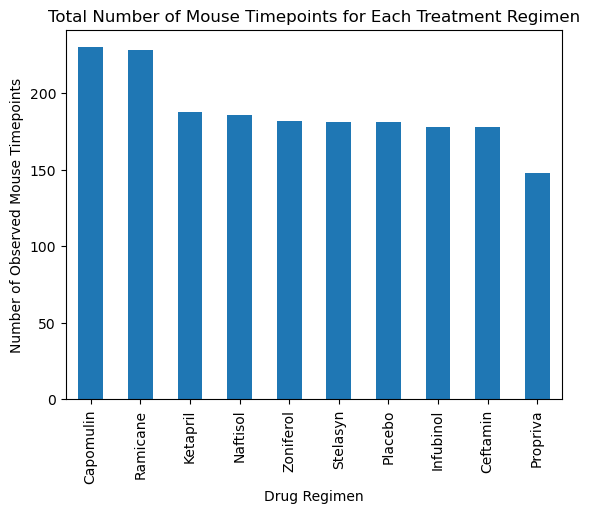

In [47]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints)f or each treatment regimen using pandas
treatment_regimen = clean_data["Drug Regimen"].value_counts()
treatment_regimen.plot(kind="bar", title="Total Number of Mouse Timepoints for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

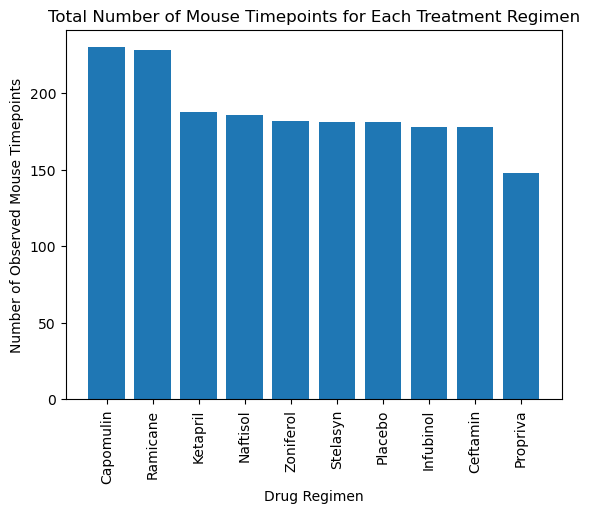

In [48]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each treatment regimen using pyplot
plt.bar(treatment_regimen.index, treatment_regimen.values)
plt.title("Total Number of Mouse Timepoints for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

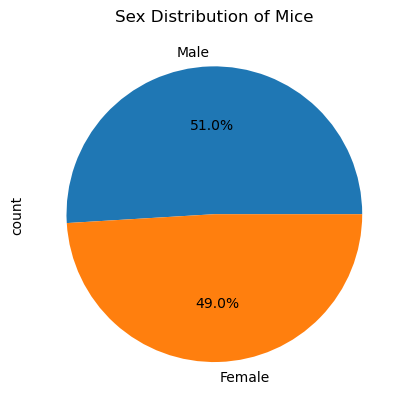

In [55]:
# a pie plot showing the sex distribution of the mice
sex_counts.plot(kind="pie", autopct="%1.1f%%", title="Sex Distribution of Mice")
plt.show()

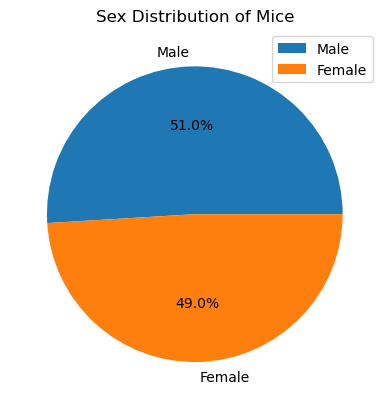

In [63]:
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Sex Distribution of Mice")
plt.legend()
plt.show()

Quartiles, Outliers and Boxplots

In [77]:
# create a dataframe that groups the data by Mouse ID and finds the max timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()\
    .reset_index()\
    .rename(columns={"Timepoint": "Max Timepoint"})
max_timepoint.head()



,Mouse ID,Max Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [73]:
# put the four treament groups, Capomulin, Ramicane, Infubinol, and Ceftamin into a list
treatment_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


In [74]:
# create an empty list to fill with the tumor volume data
tumor_volume_data = []

In [75]:
# loop through the treatment groups to get the tumor volume data for each treatment
for treatment in treatment_groups:
    tumor_volume = clean_data.loc[clean_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)
